## Аналитика в Яндекс.Афиша

Описание проекта: помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет

Источник данных: Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года: лог сервера с данными о посещениях сайта Яндекс.Афиши, выгрузка всех заказов за этот период, статистика рекламных расходов.

## Изучение данных и предобработка

Импортируем все библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Изучим первую таблицу

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')

In [3]:
display(visits.head(5))

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
visits.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

Пропусков нет

Заменим названия столбцов

In [6]:
visits = visits.rename(columns = {'Device':'device', 'End Ts':'end_ts', 'Source Id':'source_id', 'Start Ts':'start_ts', 'Uid':'uid'})

Заменим тип данных дат

In [7]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

Изучим вторую таблицу

In [8]:
orders = pd.read_csv('/datasets/orders_log.csv')

In [9]:
display(orders.head(5))

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [11]:
orders.isna().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

Пропусков нет

Заменим названия столбцов

In [12]:
orders = orders.rename(columns = {'Buy Ts':'buy_ts', 'Revenue':'revenue', 'Uid':'uid'})

Заменим тип данных даты

In [13]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

Изучим третью таблицу

In [14]:
costs = pd.read_csv('/datasets/costs.csv')

In [15]:
display(costs.head(5))

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [16]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [17]:
costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

Пропусков нет

Заменим тип данных даты

In [18]:
costs['dt'] = pd.to_datetime(costs['dt'])

## Расчет метрик

### Продуктовые метрики

Расчитаем DAU, WAU, MAU

Выделим день, неделю, месяц и год начала сессии

In [19]:
visits['session_year'] = visits['start_ts'].dt.year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week'] = visits['start_ts'].dt.week
visits['session_date'] = visits['start_ts'].dt.date

In [20]:
dau_total = visits.groupby('session_date').agg({'uid':'nunique'}).mean()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid':'nunique'}).mean()
mau_total = visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'}).mean()
print('dau:', int(dau_total))
print('wau:', int(wau_total))
print('mau:', int(mau_total))

dau: 907
wau: 5716
mau: 23228


Получили среднее значение уникальных пользователей: dau: 907, wau: 5716, mau: 23228

Теперь построим графики и посмотрим на изменения

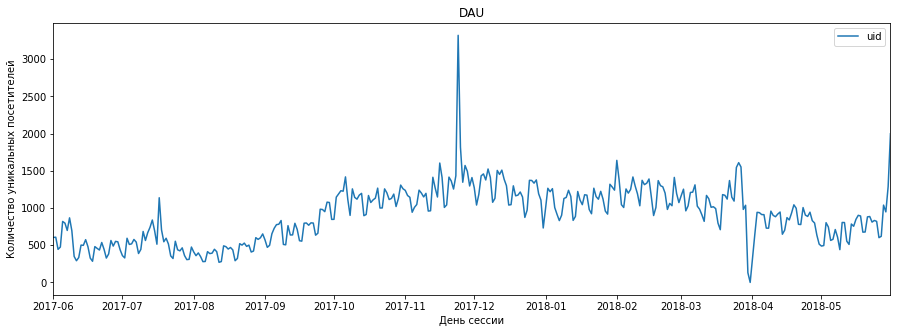

In [21]:
visits.groupby('session_date').agg({'uid':'nunique'}).plot(figsize=(15,5), title='DAU')
plt.xlabel('День сессии')
plt.ylabel('Количество уникальных посетителей')
plt.show()

По этому графику особо ничего не скажешь, предлагаю рассмотреть график сгруппирую по дням недели

In [22]:
visits['session_weekday'] = visits['start_ts'].dt.weekday

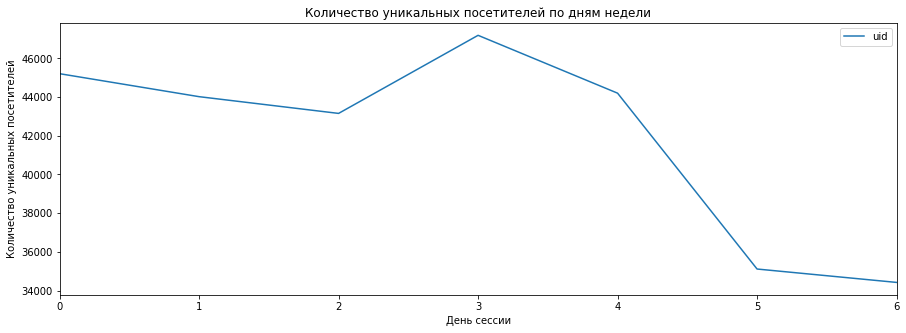

In [23]:
visits.groupby('session_weekday').agg({'uid':'nunique'}).plot(figsize=(15,5), title='Количество уникальных посетителей по дням недели')
plt.xlabel('День сессии')
plt.ylabel('Количество уникальных посетителей')
plt.show()

Теперб можно сказать, что больше посетителей приходит в будние дни, а на выходных спад

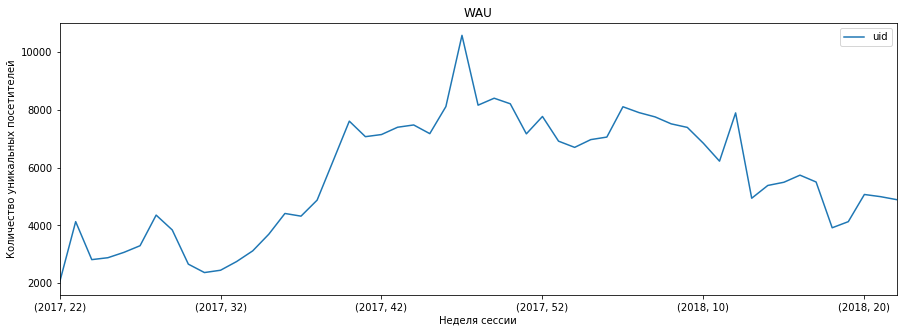

In [24]:
visits.groupby(['session_year', 'session_week']).agg({'uid':'nunique'}).plot(figsize=(15,5), title='WAU')
plt.xlabel('Неделя сессии')
plt.ylabel('Количество уникальных посетителей')
plt.show()

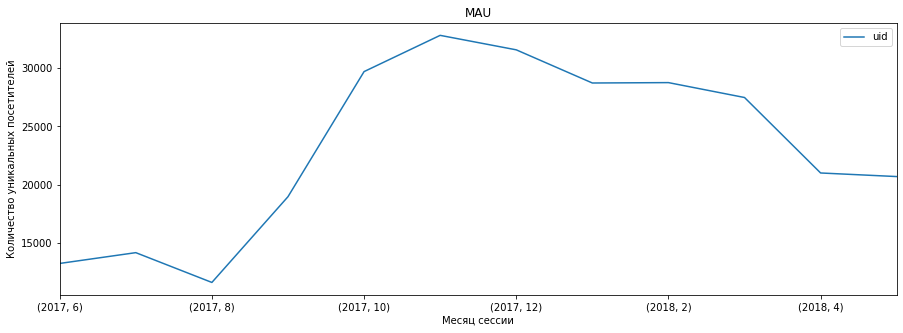

In [25]:
visits.groupby(['session_year', 'session_month']).agg({'uid':'nunique'}).plot(figsize=(15,5), title='MAU')
plt.xlabel('Месяц сессии')
plt.ylabel('Количество уникальных посетителей')
plt.show()

Получили среднее значение уникальных пользователей: dau: 907, wau: 5716, mau: 23228. по графикам можно сказать, что в будние дни посетитей больше, на выходных идет спад. Летом количество ползователей значительно падает, зимой достигает своего пика и весной обратно идет на снижение

Определим сколько в среднем за день ползьователи заходят на сайт

In [26]:
session_per_user = visits.groupby('session_date').agg({'uid':['count', 'nunique']})
session_per_user.columns = ['n_sessions', 'n_users']
session_per_user['sess_per_user'] = session_per_user['n_sessions'] / session_per_user['n_users']
print(session_per_user['sess_per_user'].mean())

1.082169644003972


И построим график изменений

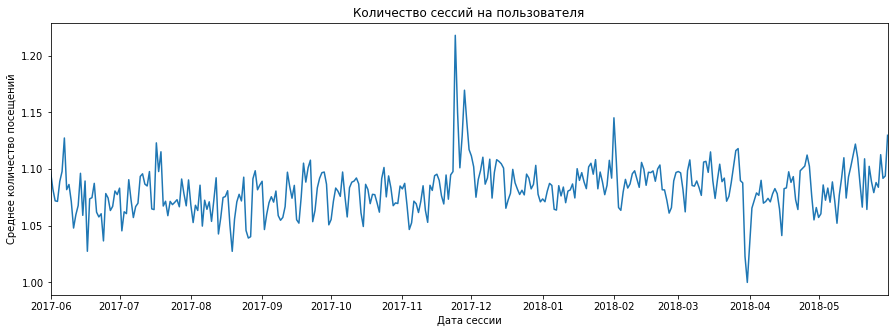

In [27]:
session_per_user['sess_per_user'].plot(figsize=(15, 5), title='Количество сессий на пользователя')
plt.xlabel('Дата сессии')
plt.ylabel('Среднее количество посещений')
plt.show()

1.08 раз в среднем ползьзователи заходт на сайт. По графику видим, что ситуация за год не сильно меняется. Есть выбросы, но в среднем значение равно от 1.05 до 1.1

Узнаем сколько в среднем времени пользователи проводят на сайте

In [28]:
visits['asl_sec'] = visits['end_ts'] - visits['start_ts']
visits['asl_sec'] = visits['asl_sec'].dt.seconds

Теперь построим график распределени, чтобы узнать какую меру среднего лучше всего использовать

Text(0, 0.5, 'Количество поьзователей')

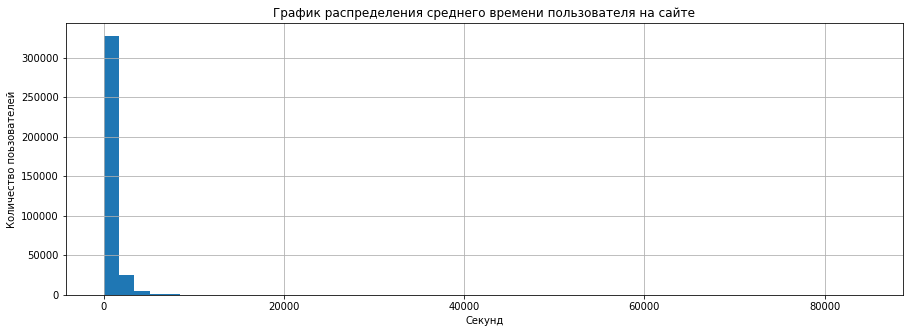

In [29]:
visits['asl_sec'].hist(bins=50, figsize=(15, 5))
plt.title('График распределения среднего времени пользователя на сайте')
plt.xlabel('Секунд')
plt.ylabel('Количество поьзователей')

Наше распределение не похоже на нормальное, значит используем моду, для показател среднего

In [30]:
visits['asl_sec'].mode()

0    60
dtype: int64

Расчитали моду и высянили, что средняя сессия пользователя длится 60 секунд. При падении данного показателя, нужно задуматся и выдвинуть гипотезы, почему так могло случится

Расчитаем Retantion Rate применив когортный анализ

Найдем первую дату визита каждого пользователя

In [31]:
first_visit = visits.groupby('uid')['start_ts'].min()

In [32]:
first_visit.name = 'first_visit_date'

In [33]:
visits = visits.join(first_visit, on='uid')

In [34]:
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')
visits['first_visit_month'] = visits['first_visit_date'].astype('datetime64[M]')

Найдем время каждого посещения после первого для каждого пользователя

In [35]:
visits['cohort_lifetime'] = ((visits['visit_month'] - visits['first_visit_month']) / np.timedelta64(1, 'M')).round().astype('int')

Создадим когорты

In [36]:
cohorts = visits.groupby(['first_visit_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

Найдем начальное количество пользователей в каждой когорте

In [37]:
start_user_counts = cohorts[cohorts['cohort_lifetime'] == 0][['first_visit_month', 'uid']]

In [38]:
start_user_counts.columns = ('first_visit_month', 'cohort_users')

In [39]:
cohorts = cohorts.merge(start_user_counts, on='first_visit_month')

Посчитаем Retention Rate для каждой когорты

In [40]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']

сформируем таблицу по ккогортам их их retention rate в каждый последующий месяц. и Пострим тепловую карту

In [41]:
cohort_pivot = cohorts.pivot_table(index='first_visit_month', columns='cohort_lifetime', values='retention', aggfunc='sum')

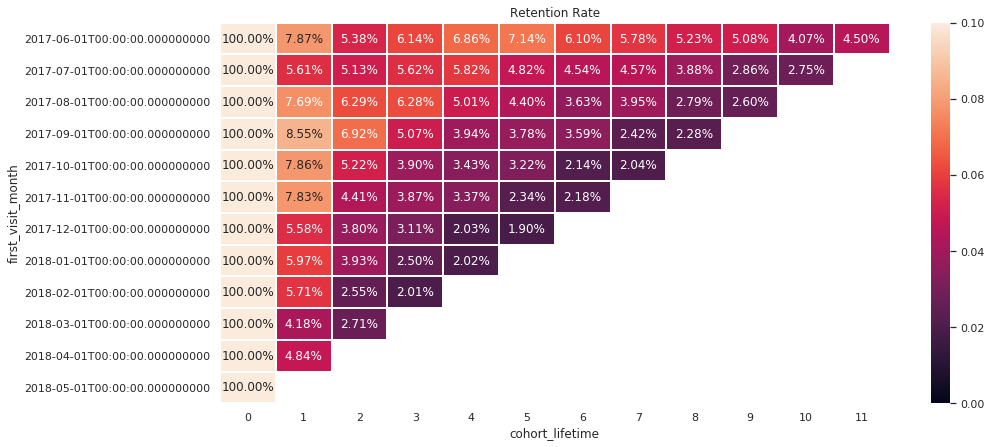

In [42]:
sns.set(style='white')
plt.figure(figsize=(15,7))
plt.title('Retention Rate')
sns.heatmap(cohort_pivot, annot=True, fmt='.2%', linewidths=1, linecolor='white', vmin=0, vmax=0.1)
plt.show()

И посчитаем среднее для каждого месяца жизник когорты

In [43]:
cohort_pivot.mean(0)

cohort_lifetime
0     1.000000
1     0.065167
2     0.046333
3     0.042760
4     0.040595
5     0.039444
6     0.036957
7     0.037509
8     0.035465
9     0.035159
10    0.034062
11    0.044951
dtype: float64

Очент мало пользователей возвращается после первого посещения. На второй месяц возвращается около 6,5%. Далее возвращаюется все меньше и меньше пользователей

Вывод: Среднее значение уникальных пользователей: dau: 907, wau: 5716, mau: 23228. По графикам можно сказать, что в будние дни посетитей больше, на выходных идет спад. Летом количество ползователей значительно падает, зимой достигает своего пика и весной обратно идет на снижение. Расчитали моду и высянили, что средняя сессия пользователя длится 60 секунд. При падении данного показателя, нужно задуматся и выдвинуть гипотезы, почему так могло случится. Очень мало пользователей возвращается после первого посещения. На второй месяц возвращается около 6,5%. Далее возвращаюется все меньше и меньше пользователей

### Метрики электронной коммерции

Исследуем, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки

Найдем дату первой покупки и объеденим с таблицей визитов

In [44]:
first_order = orders.groupby('uid')['buy_ts'].min()

In [45]:
first_order.name = 'first_order_date'

In [46]:
visits_order = visits.merge(first_order, on='uid')

Возьмем нужные столбцы и удалим дубликаты

In [47]:
visits_order = visits_order[['uid','first_visit_date','first_order_date']]

In [48]:
visits_order = visits_order.drop_duplicates()

Найдем время между первой покупкой и первым визитом и переведем в секунды

In [49]:
visits_order['time_to_purchase'] = visits_order['first_order_date'] - visits_order['first_visit_date']

In [50]:
visits_order['sec_to_purchase'] = visits_order['time_to_purchase'] / np.timedelta64(1, 's')

Посмотрим на распределение, чтобы понять какое значение лучше использовать

<function matplotlib.pyplot.show(*args, **kw)>

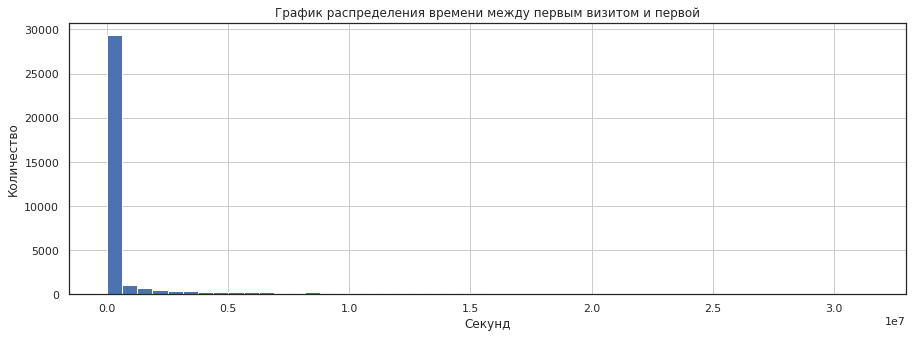

In [51]:
visits_order['sec_to_purchase'].hist(bins=50, figsize=(15, 5))
plt.title('График распределения времени между первым визитом и первой')
plt.xlabel('Секунд')
plt.ylabel('Количество')
plt.show

In [52]:
visits_order['sec_to_purchase'].mode()

0    60.0
dtype: float64

Среднее время между первым визитом и первой покупкой составляет 60 секунд

Рассчитаем среднее количество покупок на одного покупателя за 6 месяцев

Добавим в таблицу значение первого визита и обрежем даты до месяца

In [53]:
orders_first_visit = orders.join(first_visit, on='uid')

In [54]:
orders_first_visit['first_visit_month'] = orders_first_visit['first_visit_date'].astype('datetime64[M]')
orders_first_visit['buy_month'] = orders_first_visit['buy_ts'].astype('datetime64[M]')

Вычеслим время прошедшее от первого визита до каждой покупки и уберем строки, где прошло больше 6 месяцев

In [55]:
orders_first_visit['lifetime'] = ((orders_first_visit['buy_month'] - orders_first_visit['first_visit_month'])\
/ np.timedelta64(1, 'M')).round().astype('int')

In [56]:
orders_6_month = orders_first_visit.query('lifetime < 6')

Разделим число покупок на количество уникальных ползователей

In [57]:
orders_6_month['revenue'].count() / orders_6_month['uid'].nunique()

1.3110290594436145

среднее количество покупок на одного покупателя за 6 месяцев - 1.31

Рассчитаем средний чек, применяя группировку по времени совершения покупки

In [58]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')

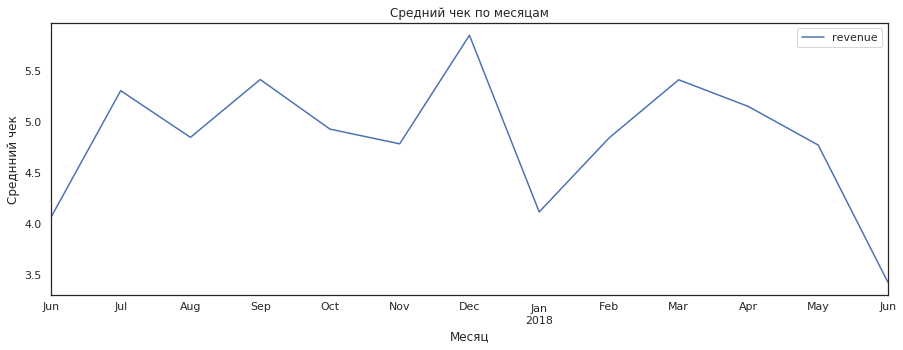

In [59]:
orders.groupby('order_month').agg({'revenue':'mean'}).plot(figsize=(15, 5), title='Средний чек по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Среднний чек')
plt.show()

Видим, что средний чек достигает своего пика в декабре и уже в январе показывает почти минимальный показатель. В июне самый маленький средний чек

Рассчитам средний LTV по когортам за 6 месяцев

добавим столбец с датой первой покупки

In [60]:
first_order = orders.groupby('uid')['order_month'].min().reset_index()

In [61]:
first_order.columns = ['uid', 'first_order_month']

In [62]:
orders_new = orders.merge(first_order, on='uid')

Посчитаем сколько пользователей в каждой когорте в первый месяц

In [63]:
cohort_sizes = first_order.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()

In [64]:
cohort_sizes.columns = ['first_order_month', 'n_buyers']

Посчитаем количесвто и общую сумму заказов в каждой когорте

In [65]:
cohorts_orders = orders_new.groupby(['first_order_month', 'order_month']).agg({'revenue':'sum', 'uid':'count'}).reset_index()

In [66]:
cohorts_orders.columns = ['first_order_month', 'order_month', 'revenue_sum', 'orders_cnt']

Найдем время жизни когорты

In [67]:
cohorts_orders['lifetime'] = ((cohorts_orders['order_month'] - cohorts_orders['first_order_month'])\
/ np.timedelta64(1, 'M')).round().astype('int')

In [68]:
cohorts_orders = cohorts_orders.merge(cohort_sizes, on='first_order_month')

Посчитаем валовую прибыль и LTV

In [69]:
margin_rate = 1

In [70]:
cohorts_orders['gp'] = cohorts_orders['revenue_sum'] * margin_rate

In [71]:
cohorts_orders['ltv'] = cohorts_orders['gp'] / cohorts_orders['n_buyers']

In [72]:
final_ltv = cohorts_orders.pivot_table(index='first_order_month', columns='lifetime', values='ltv', aggfunc='mean')

In [73]:
final_ltv = final_ltv.cumsum(axis=1).round(2)

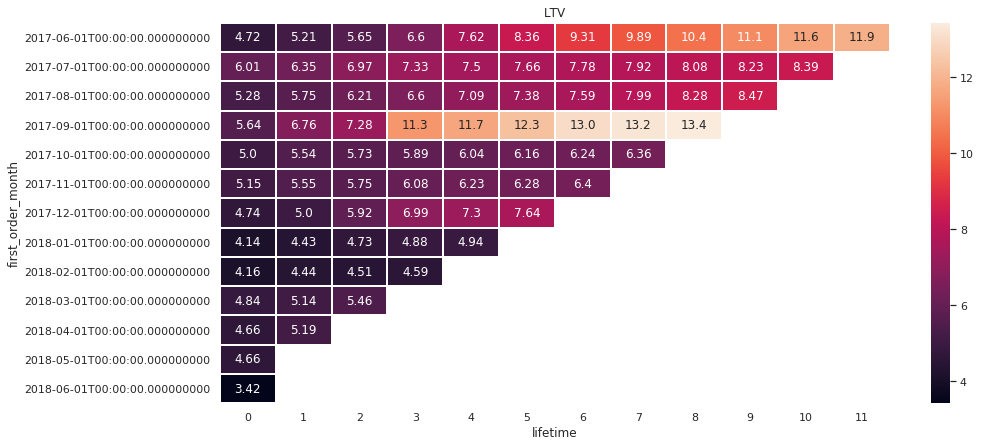

In [74]:
sns.set(style='white')
plt.figure(figsize=(15,7))
plt.title('LTV')
sns.heatmap(final_ltv, annot=True, fmt='.3', linewidths=1, linecolor='white')

In [75]:
final_ltv[5].dropna().mean()

7.970000000000001

Средний LTV по когортам за 6 месяцев равен 7.97

Вывод: Среднее время между первым визитом и первой покупкой составляет 60 секунд. Среднее количество покупок на одного покупателя за 6 месяцев - 1.31. Средний чек самый высокий в декабре и уже в январе показывает почти минимальный показатель. В июне самый маленький средний чек. Средний LTV по когортам за 6 месяцев равен 7.97. Когорты 2017-06 и 2017-09 приносят больше всего денег

### Маркетинговые метрики

Посчитаем общую сумму расходов на маркетинг

In [76]:
costs['costs'].sum()

329131.62

Общие расходы на маркетинг составили 329131

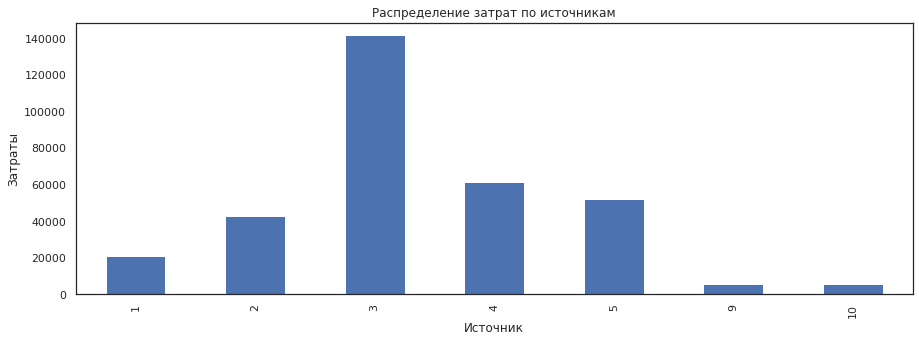

In [77]:
plt.figure(figsize=(15, 5))
costs.groupby('source_id')['costs'].sum().plot(kind='bar', title='Распределение затрат по источникам')
plt.xlabel('Источник')
plt.ylabel('Затраты')
plt.show()

Больше все затрат уходит на 3 источник, около 140 000. На 2, 3, 4 уходит 40 000 - 60 000. Практически нет затрат на 9 и 10 источники.

Визуализируем изменение затрат по времени

In [78]:
costs['month'] = costs['dt'].astype('datetime64[M]')

Text(0, 0.5, 'Затраты')

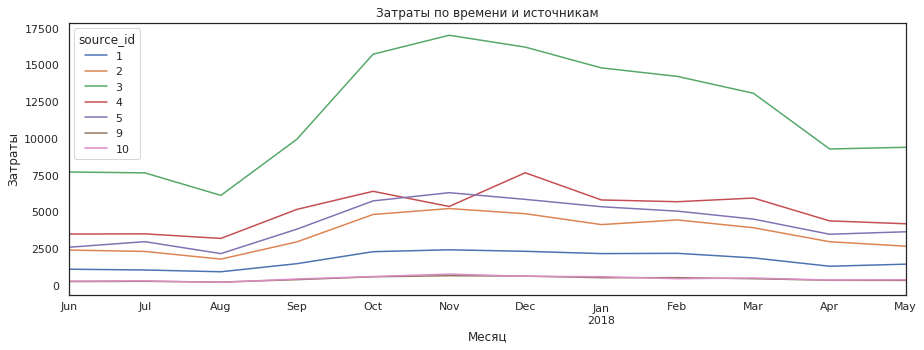

In [79]:
costs.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum').plot(figsize=(15,5))
plt.title('Затраты по времени и источникам')
plt.xlabel('Месяц')
plt.ylabel('Затраты')

Text(0, 0.5, 'Затраты')

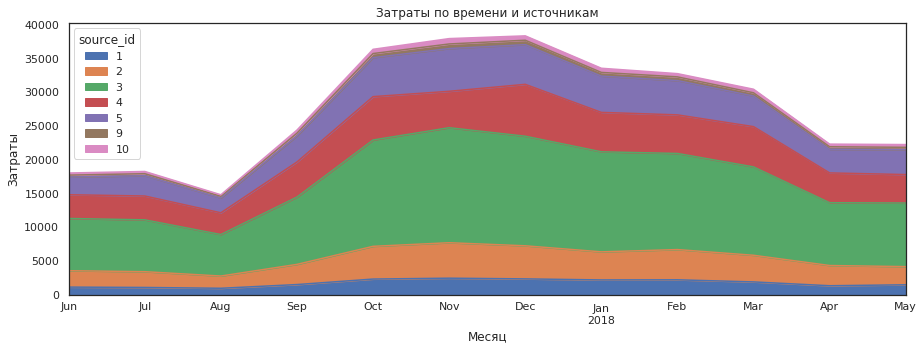

In [80]:
costs.pivot_table(index='month', columns='source_id', values='costs', aggfunc='sum').plot.area(figsize=(15,5))
plt.title('Затраты по времени и источникам')
plt.xlabel('Месяц')
plt.ylabel('Затраты')

Затраты на 3 источник занчитильно выше но протяжении всего года, но еще больше вырастают начиная с осени и растут до зимы, затем уменьшаются к лету. На остальные источники затраты приблизительно одинаковые на протжении всего года

Рассчитаем средний CAC на одного покупателя для всего проекта

для начала сравним, чтобы даты в обеих таблицах совпадали

In [81]:
orders['buy_ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: buy_ts, dtype: object

In [82]:
costs['dt'].describe()

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: dt, dtype: object

Практически совпадают, немного исправим

In [83]:
orders = orders.query('buy_ts < "2018-06-01"')

In [84]:
costs['costs'].sum() / orders['uid'].nunique()

9.011872843765401

Средний CAC на одного покупателя для всего проекта равен 9.01

Рассчитаем средний CAC для каждого источника трафика

Найдем первый источник каждого посетителя

In [85]:
first_visit1 = visits.groupby(['uid', 'source_id'])['start_ts'].min().reset_index()

In [86]:
first_visit2 = visits.groupby('uid')['start_ts'].min().reset_index()

In [87]:
first_source = pd.merge(first_visit2, first_visit1, on=['uid', 'start_ts'], how='left')

Нам надо посчитать cac по покупателям, поэтому оставим только пользователей, которые совершили покупки

In [88]:
orders_unique = orders['uid'].unique()

In [89]:
first_source = first_source.query('uid in @orders_unique')

Теперь найдем количество пользователей пришедших с каждого источника и затраты на каждый источник

In [90]:
cnt_source = first_source.groupby('source_id')['uid'].nunique()

In [91]:
source_sum = costs.groupby('source_id')['costs'].sum()

In [92]:
cac_source = pd.merge(cnt_source, source_sum, on='source_id')

In [93]:
cac_source['cac'] = cac_source['costs'] / cac_source['uid']

Text(0, 0.5, 'Затраты')

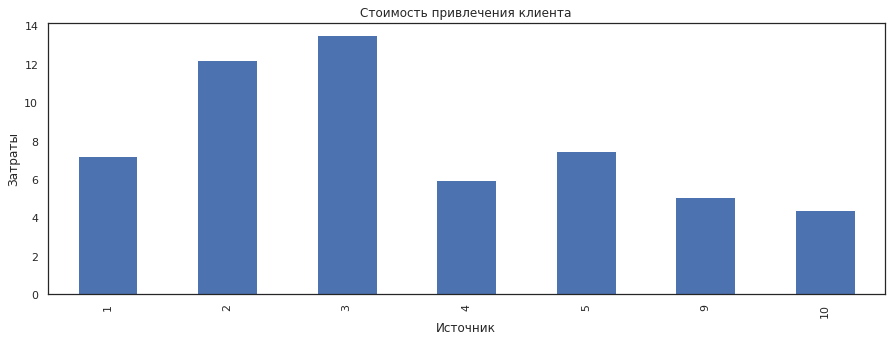

In [94]:
cac_source['cac'].plot(kind='bar', figsize=(15,5))
plt.title('Стоимость привлечения клиента')
plt.xlabel('Источник')
plt.ylabel('Затраты')

Видим, что самый дорогой источник это 2 и 3. А меньше всего затрат на привлечение исходит от 9 и 10 источника

Рассчитаем ROMI по когортам в разрезе источников

In [95]:
costs_month = costs.groupby('month')['costs'].sum().reset_index()

In [96]:
cohorts_orders = pd.merge(cohorts_orders, costs_month, left_on='first_order_month', right_on='month')

In [97]:
cohorts_orders['cac'] = cohorts_orders['costs'] / cohorts_orders['n_buyers']

In [98]:
cohorts_orders['romi'] = cohorts_orders['ltv'] / cohorts_orders['cac']

In [99]:
final_romi = cohorts_orders.pivot_table(index='first_order_month', columns='lifetime', values='romi', aggfunc='mean')

In [100]:
final_romi = final_romi.cumsum(axis=1).round(2)

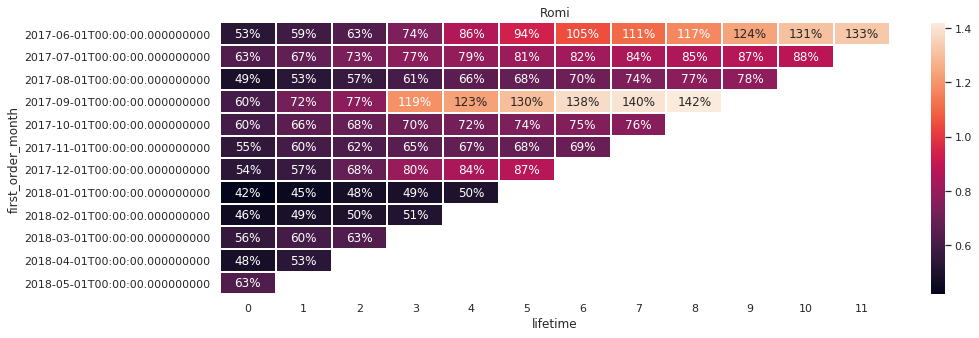

In [101]:
sns.set(style='white')
plt.figure(figsize=(15,5))
plt.title('Romi')
sns.heatmap(final_romi, annot=True, fmt='.0%', linewidth='1', linecolor='white')

Когорта 2017-06 и 2017-09 самые перспективные для компании когорты. Они приносят хорошую прибыль и достаточно быстро окупаются.

Посчитаем среднее

In [102]:
final_romi.mean(axis=0) 

lifetime
0     0.540833
1     0.582727
2     0.629000
3     0.717778
4     0.783750
5     0.860000
6     0.898333
7     0.970000
8     1.052500
9     0.963333
10    1.095000
11    1.330000
dtype: float64

Рассчитаем ROMI по когортам в разрезе источников

Найдем через какой источник пришел пользователь

In [103]:
first_source = first_source[['uid', 'source_id']]

In [104]:
orders_source = pd.merge(orders, first_source, how='left', on='uid')

Найдемпервый месяц покупки ползьвателя

In [105]:
fm = orders_source.groupby('uid')['order_month'].min().reset_index()

In [106]:
fm.columns = ['uid', 'first_order_month']

In [107]:
orders_source = pd.merge(orders_source, fm, on='uid')

Создадим функцию, которая посчиатет Romi для каждого источника

In [108]:
source_unique = costs['source_id'].unique()

In [109]:
def pivot_source(source_unique):
    for source in source_unique:
        cohort_source = orders_source.query('source_id == @source').groupby(['first_order_month', 'order_month']).agg\
        ({'revenue':'sum', 'uid':'count'}).reset_index()
        cohort_source.columns = ['first_order_month', 'order_month', 'revenue_sum', 'orders_cnt']
        cohort_source['lifetime'] = ((cohort_source['order_month'] - cohort_source['first_order_month'])\
        / np.timedelta64(1, 'M')).round().astype('int')
        cohort_sizes = first_order.groupby('first_order_month').agg({'uid':'nunique'}).reset_index()
        cohort_sizes.columns = ['first_order_month', 'n_buyers']
        cohort_source = cohort_source.merge(cohort_sizes, on='first_order_month')
        cohort_source['gp'] = cohort_source['revenue_sum'] * margin_rate
        cohort_source['ltv'] = cohort_source['gp'] / cohort_source['n_buyers']
        costs_source = costs.query('source_id == @source').groupby('month')['costs'].sum().reset_index()
        cohort_source = pd.merge(cohort_source, costs_source, left_on='first_order_month', right_on='month')
        cohort_source['cac'] = cohort_source['costs'] / cohort_source['n_buyers']
        cohort_source['romi'] = cohort_source['ltv'] / cohort_source['cac']
        source_romi = cohort_source.pivot_table(index='first_order_month', columns='lifetime', values='romi', aggfunc='mean')
        source_romi = source_romi.cumsum(axis=1).round(2)
        sns.set(style='white')
        plt.figure(figsize=(15,5))
        plt.title(source)
        sns.heatmap(source_romi, annot=True, fmt='.0%' , linewidth='1', linecolor='white', vmin=0, vmax=1)

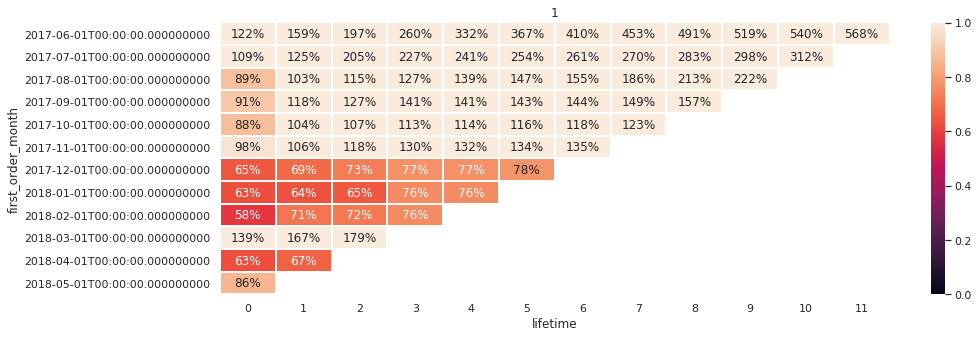

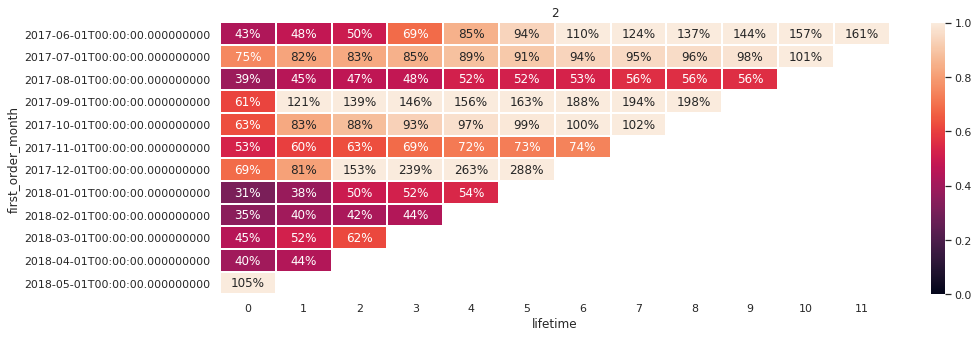

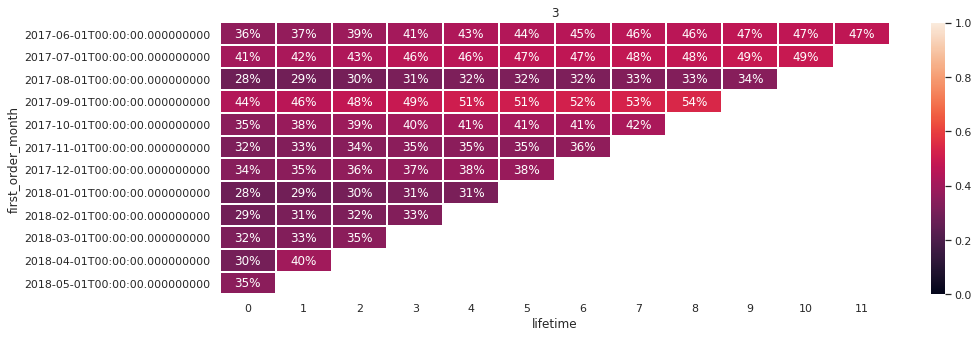

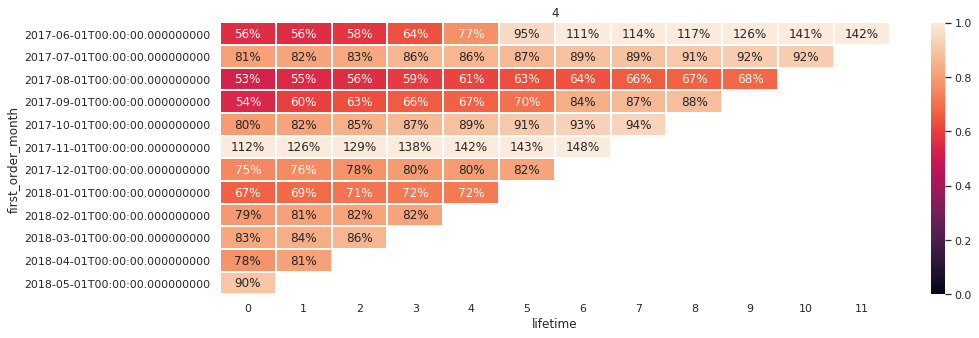

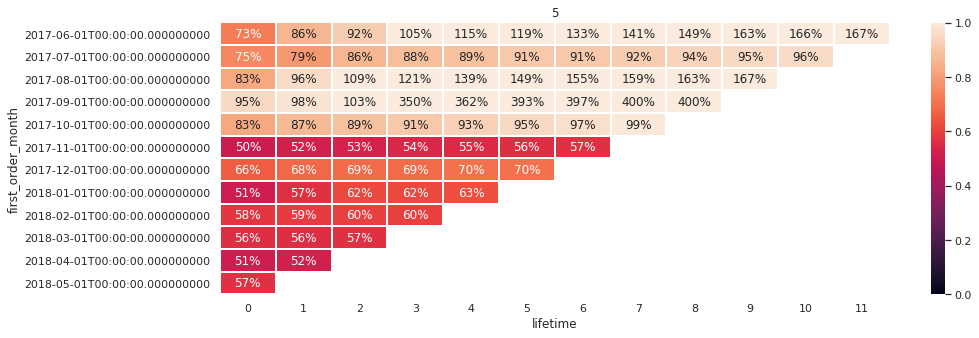

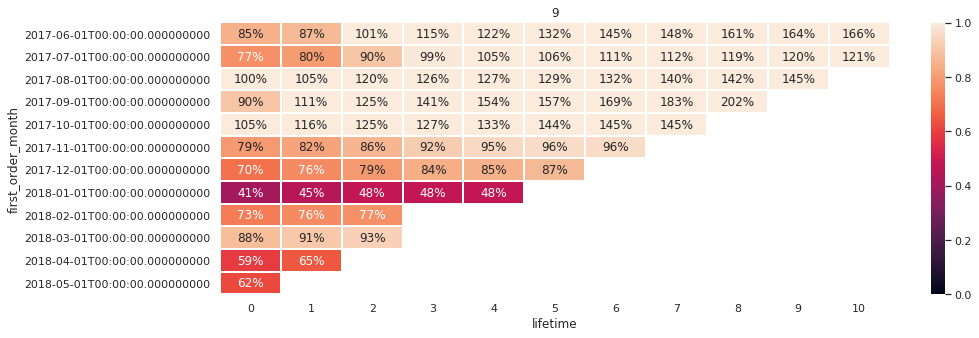

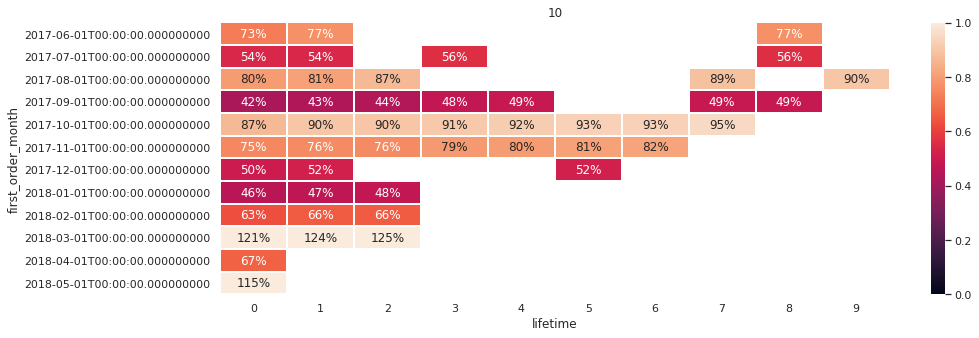

In [110]:
pivot_source(source_unique)

## Вывод

 Ориентируюясь на тепловые карты Romi, 1 это лучший источник, у него половина когорт уже откупается на второй месяц. Неплохими источниками являются 5 и 9. Чуть хуже 2 и 4. Но во всех источниках самые свежие когорты перестали откупаться кроме 1 и 10. 3 источник нужно убирать, он за год не окупается даже наполовину.<br>
    Расчитали и получили среднее значение уникальных пользователей: dau: 907, wau: 5716, mau: 23228. По графикам можно сказать, что в будние дни посетитей больше, на выходных идет спад. Летом количество ползователей значительно падает, зимой достигает своего пика и весной обратно идет на снижение.<br>
    Средняя сессия пользователя длится 60 секунд. Очень мало пользователей возвращается после первого посещения. На второй месяц возвращается около 6,5%. Далее возвращаюется все меньше и меньше пользователей. Среднее время между первым визитом и первой покупкой составляет 60 секунд.<br>
    Среднее количество покупок на одного покупателя за 6 месяцев - 1.31. Средний чек достигает своего пика в декабре и уже в январе показывает почти минимальный показатель. В июне самый маленький средний чек. Средний LTV по когортам за 6 месяцев равен 7.97 уе.<br>
    Общие расходы на маркетинг составили 329131 уе. Больше всего затрат уходит на 3 источник, около 140 000 уе. На 2, 3, 4 уходит 40 000 - 60 000 уе. Практически нет затрат на 9 и 10 источники. Затраты на 3 источник занчитильно выше на протяжении всего года, но еще больше вырастают начиная с осени и растут до зимы, затем уменьшаются к лету. На остальные источники затраты приблизительно одинаковые на протжении всего года. Средний CAC на одного покупателя для всего проекта равен 9.01 уе. Самый дорогой источник это 2 и 3. А меньше всего затрат на привлечение исходит от 9 и 10 источника.
    В среднем когорты окупаются на 9 месяц. Когорта 2017-09-01 окупилась быстрее всего, за 4 месяц. Многие когорты вообще не окупились.<br>
    В среднем когорты окупаются на 9 месяц. Когорта 2017-09-01 окупилась быстрее всего, за 4 месяц. Многие когорты вообще не окупились. Так же разным когортам подходят разные виды источников. 2017-06 по 2017-10 подходили источники 1, 5, 9. А 4 для недавних клиентов. 3 источник нужно убирать, он не окупается наполовину и на него уходит больше всего затрат.<br>